In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

import sklearn as sk
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score,f1_score,precision_score,confusion_matrix,recall_score
from sklearn.model_selection import cross_val_score,train_test_split

In [2]:
# importing datasets 
data=pd.read_csv("user_behavior_dataset.csv")
# meta data for csv files:
print("""
    Key Features:
      
• User ID: A unique identifier for each user.
• Device Model: The smartphone model used by the user.
• Operating System: iOS or Android.
• App Usage Time: Daily minutes spent on mobile apps.
• Screen On Time: Average daily hours the screen is active.
• Battery Drain: Daily battery consumption in mAh.
• Number of Apps Installed: Total apps installed on the device.
• Data Usage: Daily mobile data consumption (MB).
• Age: User's age.
• Gender: Male or Female.
• User Behavior Class: Categorical behavior class (1 to 5).

""")



    Key Features:
      
• User ID: A unique identifier for each user.
• Device Model: The smartphone model used by the user.
• Operating System: iOS or Android.
• App Usage Time: Daily minutes spent on mobile apps.
• Screen On Time: Average daily hours the screen is active.
• Battery Drain: Daily battery consumption in mAh.
• Number of Apps Installed: Total apps installed on the device.
• Data Usage: Daily mobile data consumption (MB).
• Age: User's age.
• Gender: Male or Female.
• User Behavior Class: Categorical behavior class (1 to 5).




In [3]:



# missing values and filling them

missing_values = data.isnull().sum()
print("Missing values in dataset: \n", missing_values)

data.fillna(data.select_dtypes(include=["int64","float"]).mean(), inplace=True)
print("Missing values in dataset after filling: \n", missing_values)
# check for outliers
"""  
    Q1 = data.quantile(0.25):

Calculates the first quartile (Q1), or the 25th percentile, for each column in data.
Q1 is the value below which 25% of the data falls.
Q3 = data.quantile(0.75):

Calculates the third quartile (Q3), or the 75th percentile, for each column in data.
Q3 is the value below which 75% of the data falls.
IQR = Q3 - Q1:

Calculates the Interquartile Range (IQR) by subtracting Q1 from Q3.
The IQR represents the middle 50% of the data, measuring the spread of values around the median.

The IQR is a useful measure of variability because it is less sensitive to outliers than other measures of dispersion, such as the standard deviation. It helps identify potential anomalies or errors in the data.
"""
Q1 = data.select_dtypes(include=["int64","float"]).quantile(0.25)
Q3 = data.select_dtypes(include=["int64","float"]).quantile(0.75)
IQR = Q3 - Q1
print("Interquartile range: \n", IQR)



Missing values in dataset: 
 User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64
Missing values in dataset after filling: 
 User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64
Interquartile range: 
 User ID                        349.50
App Usage Time (min/day)       321.00
Screen On Time (hours/day)       4.90
Battery Drain (mAh/day)       1507.25
Number of Apps Installe

In [4]:
data

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3
...,...,...,...,...,...,...,...,...,...,...,...
695,696,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4
697,698,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1


In [5]:
data.dtypes

User ID                         int64
Device Model                   object
Operating System               object
App Usage Time (min/day)        int64
Screen On Time (hours/day)    float64
Battery Drain (mAh/day)         int64
Number of Apps Installed        int64
Data Usage (MB/day)             int64
Age                             int64
Gender                         object
User Behavior Class             int64
dtype: object

In [6]:

data.select_dtypes(include="object").columns.to_list()

['Device Model', 'Operating System', 'Gender']

In [7]:
# Checking for correct formatting
print(data.dtypes )

# checking for duplicate rows

duplicates = data.duplicated()
print("Duplicate rows: \n", duplicates.sum())

# checking that numerical values are in numerical range and categorical values are in categorical range
# both in numerical and categorical are correct formatting

#  categorical values are

categorical_columns = data.select_dtypes(include="object").columns.to_list()


# numerical values are 

numerical_columns = data.select_dtypes(include=["int64", "float64"]).columns.to_list()


# check that which column should i remove : 
# USER ID, data usages and battery drain
removing_columns =["Battery Drain (mAh/day)",  "Data Usage (MB/day)"," User ID"]

# removing columns
clean_data=data.copy()
# clean_data=data.drop(removing_columns,axis=1)






User ID                         int64
Device Model                   object
Operating System               object
App Usage Time (min/day)        int64
Screen On Time (hours/day)    float64
Battery Drain (mAh/day)         int64
Number of Apps Installed        int64
Data Usage (MB/day)             int64
Age                             int64
Gender                         object
User Behavior Class             int64
dtype: object
Duplicate rows: 
 0


In [8]:
# compute summary statistics for Appusage and Battery drain and data usage

# summary_stats=data.describe()
data.describe()
# print("Summary statistics for App usage and Battery drain and Data usage: \n", summary_stats)

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


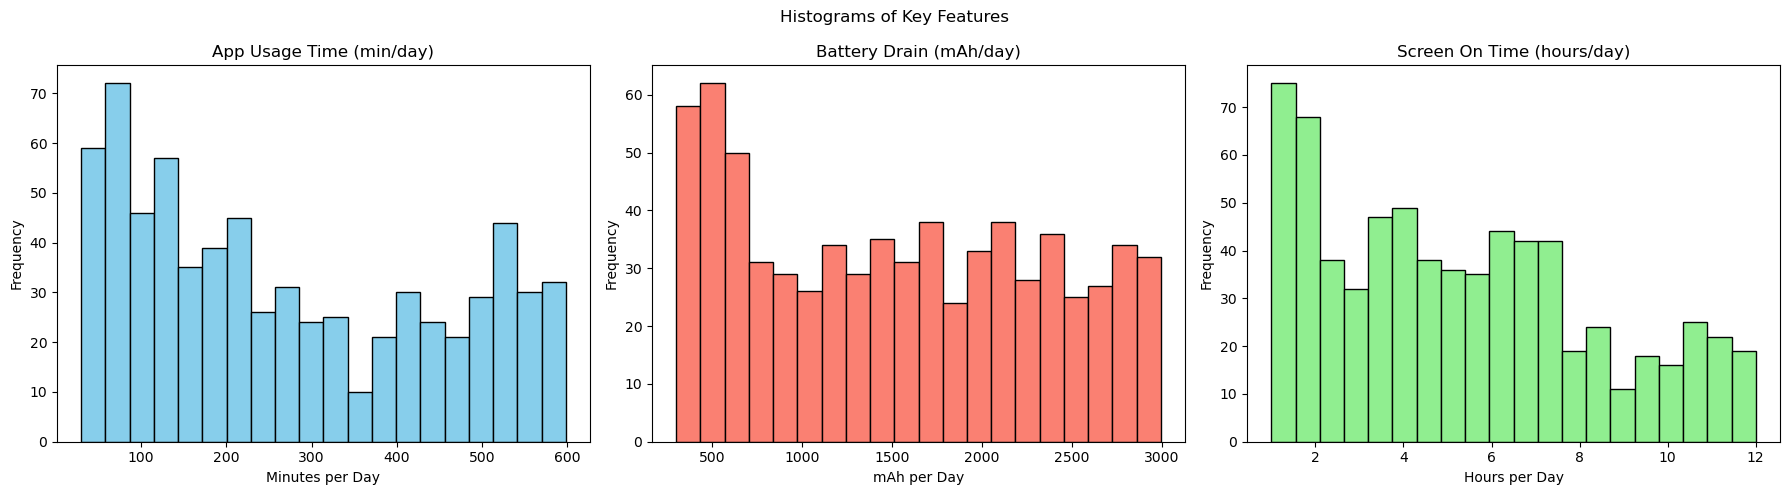

In [9]:
#  EDA by visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Histograms of Key Features')

# Histogram for App Usage Time
axes[0].hist(clean_data['App Usage Time (min/day)'], bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('App Usage Time (min/day)')
axes[0].set_xlabel('Minutes per Day')
axes[0].set_ylabel('Frequency')

# Histogram for Battery Drain
axes[1].hist(clean_data['Battery Drain (mAh/day)'], bins=20, color='salmon', edgecolor='black')
axes[1].set_title('Battery Drain (mAh/day)')
axes[1].set_xlabel('mAh per Day')
axes[1].set_ylabel('Frequency')

# Histogram for Screen On Time
axes[2].hist(clean_data['Screen On Time (hours/day)'], bins=20, color='lightgreen', edgecolor='black')
axes[2].set_title('Screen On Time (hours/day)')
axes[2].set_xlabel('Hours per Day')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

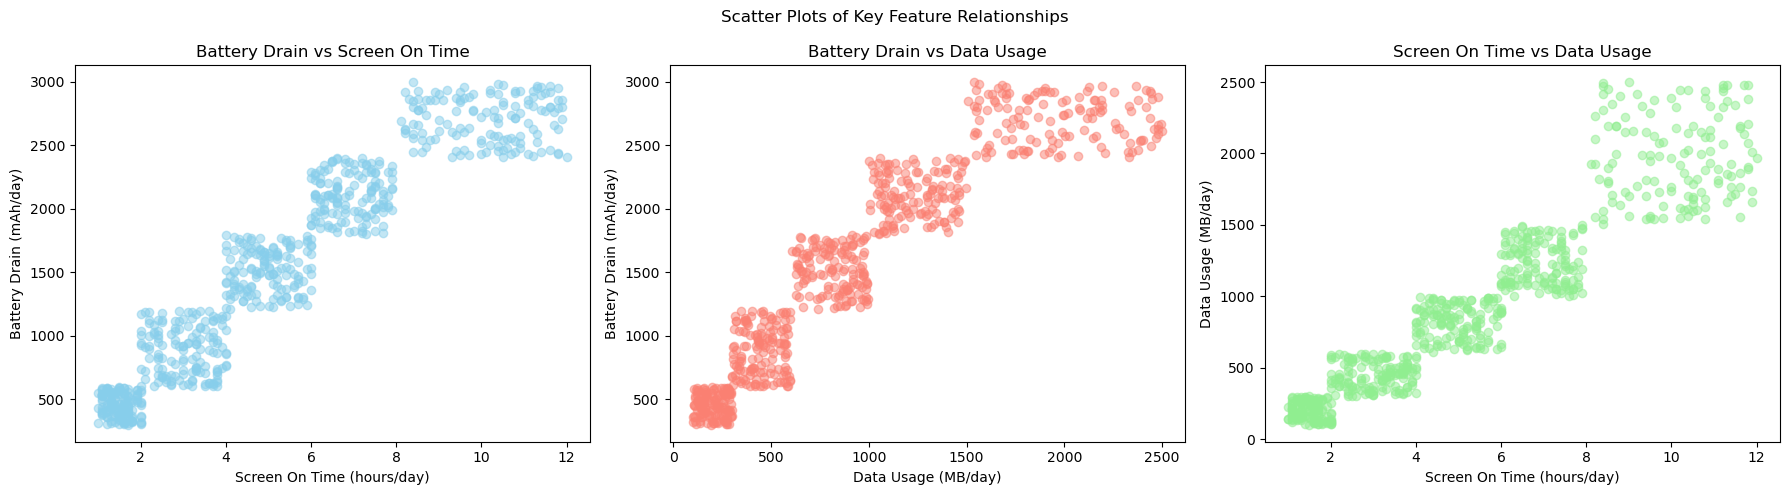

In [10]:
# Scatter plots to analyze correlations between Battery Drain, Screen On Time, and Data Usage
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Scatter Plots of Key Feature Relationships')

# Battery Drain vs Screen On Time
axes[0].scatter(clean_data['Screen On Time (hours/day)'], clean_data['Battery Drain (mAh/day)'], alpha=0.5, color='skyblue')
axes[0].set_title('Battery Drain vs Screen On Time')
axes[0].set_xlabel('Screen On Time (hours/day)')
axes[0].set_ylabel('Battery Drain (mAh/day)')

# Battery Drain vs Data Usage
axes[1].scatter(clean_data['Data Usage (MB/day)'], clean_data['Battery Drain (mAh/day)'], alpha=0.5, color='salmon')
axes[1].set_title('Battery Drain vs Data Usage')
axes[1].set_xlabel('Data Usage (MB/day)')
axes[1].set_ylabel('Battery Drain (mAh/day)')

# Screen On Time vs Data Usage
axes[2].scatter(clean_data['Screen On Time (hours/day)'], clean_data['Data Usage (MB/day)'], alpha=0.5, color='lightgreen')
axes[2].set_title('Screen On Time vs Data Usage')
axes[2].set_xlabel('Screen On Time (hours/day)')
axes[2].set_ylabel('Data Usage (MB/day)')

plt.tight_layout()
plt.show()


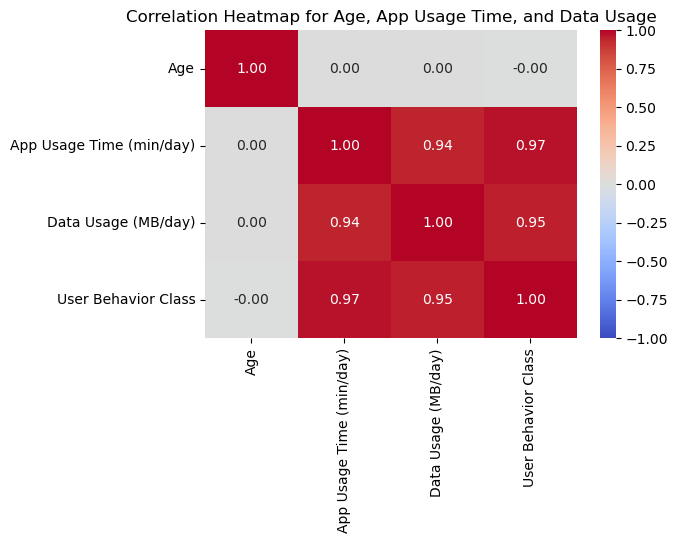

In [11]:
# Select only the numerical columns for correlation calculation
selected_data = clean_data[['Age', 'App Usage Time (min/day)', 'Data Usage (MB/day)','User Behavior Class']]

# Generate the Correlation Heatmap for the selected features
plt.figure(figsize=(6, 4))
sns.heatmap(selected_data.corr(), annot=True, cmap='coolwarm', fmt='.2f',vmin=-1,vmax=1)
plt.title('Correlation Heatmap for Age, App Usage Time, and Data Usage')
plt.show()

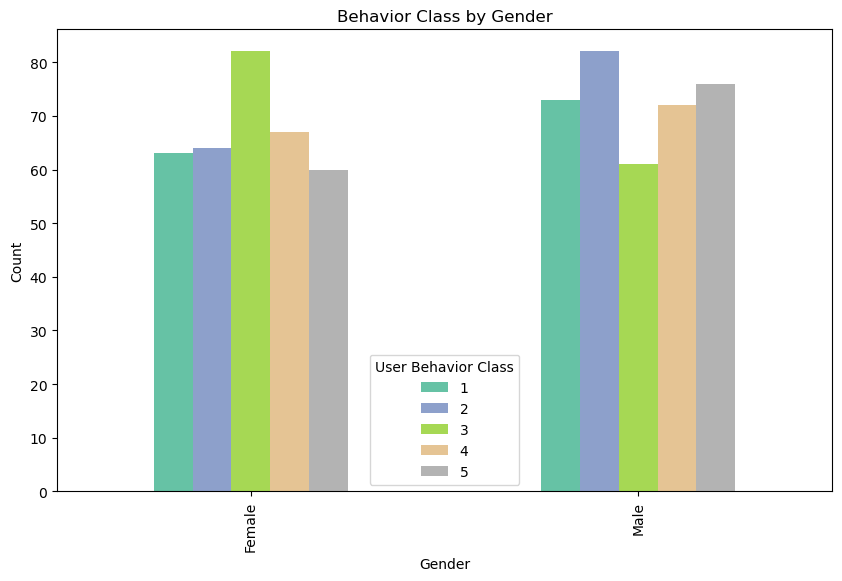

In [12]:
gender_counts = clean_data.groupby('Gender')['User Behavior Class'].value_counts().unstack()
gender_counts.plot(kind='bar', stacked=False, figsize=(10, 6), colormap='Set2')  # Optional: Customize colors with colormap
plt.title('Behavior Class by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='User Behavior Class')
plt.show()

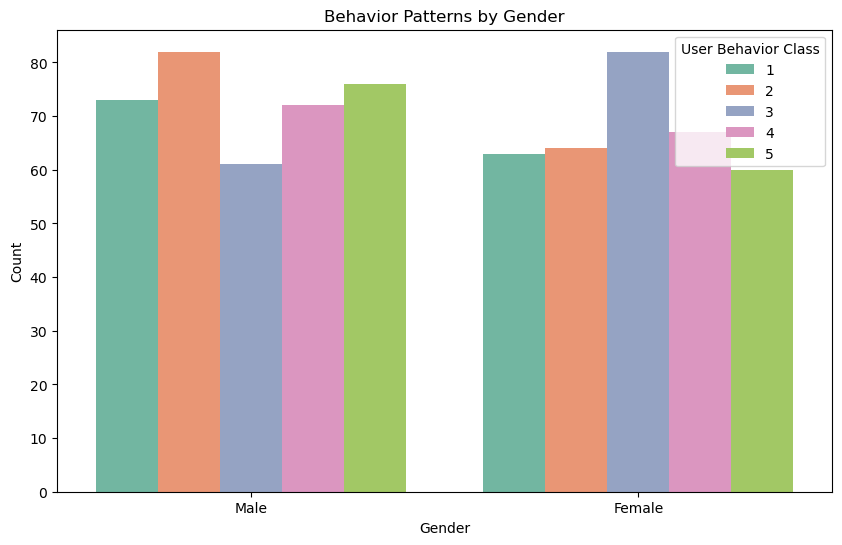

In [13]:
clean_data['Age Group'] = pd.cut(clean_data['Age'], bins=[0, 18, 30, 50, 100], labels=['0-18', '19-30', '31-50', '50+'])

# Bar chart: Gender-wise behavior with customized colors
plt.figure(figsize=(10, 6))
sns.countplot(data=clean_data, x='Gender', hue='User Behavior Class', palette='Set2')  # Try 'Set2' or a custom color palette
plt.title('Behavior Patterns by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='User Behavior Class')
plt.show()

In [14]:
# Feature Selection statistics
print("""
      
      Feature Selection statistics for App usage and Battery drain
      
      • Efficently interaction: Ration of screen time and app usage
      • battery and app usage: Ration of battery drain and app usage
      • Converting age to category: 
                            • 18-25: S
                            • 26-35: M
                            • 36-50: L
      • Thereshold of appuser and data usage: 
                            • 227 app usage: Medium usage
                            • 300 app usage: Medium usage
                            • 500+ app usage: High usage
      
      """)

# Ration of Screen on time and App usage and saved in Interactions

Interactions=clean_data.copy()
clean_data["Interactions"]=Interactions["App Usage Time (min/day)"]/Interactions["Screen On Time (hours/day)"]
clean_data.head()
# Ration of Battery Drain and App usage and saved in 
clean_data["Battery Drain (mAh/day)"]
clean_data["App-battery-drain"]=Interactions["Battery Drain (mAh/day)"]/Interactions["App Usage Time (min/day)"]

# Grouping Age in differnet things

clean_data["Age_Group"]=pd.cut(clean_data["Age"], bins=[18, 25, 45, 60], labels=["S", "M", "L"])

# Creating a threshold for app usage and data usage

clean_data["App_Usage_Group"]=pd.cut(clean_data["App Usage Time (min/day)"], bins=[0, 227, 300, 10000], labels=["Low", "Medium", "High"])
clean_data["Data_Usage_Group"]=pd.cut(clean_data["Data Usage (MB/day)"], bins=[0, 500, 1300, 100000], labels=["Low", "Medium", "High"])




      
      Feature Selection statistics for App usage and Battery drain
      
      • Efficently interaction: Ration of screen time and app usage
      • battery and app usage: Ration of battery drain and app usage
      • Converting age to category: 
                            • 18-25: S
                            • 26-35: M
                            • 36-50: L
      • Thereshold of appuser and data usage: 
                            • 227 app usage: Medium usage
                            • 300 app usage: Medium usage
                            • 500+ app usage: High usage
      
      


In [15]:
# Normatization of app usage time, data usage time
from sklearn.preprocessing import   MinMaxScaler
clean_data["App Usage Time (min/day)"] = sk.preprocessing.MinMaxScaler(feature_range=(0, 1)).fit_transform(clean_data[["App Usage Time (min/day)"]])

clean_data["Screen On Time (hours/day)"]=sk.preprocessing.MinMaxScaler(feature_range=(0,1)).fit_transform(clean_data[["Screen On Time (hours/day)"]])



In [16]:
# Def Euclidean Distance

def euclidean_distance(x, y):
    x = np.array(x)
    y = np.array(y)
    return np.sqrt(np.sum(np.square(x - y)))

# use this formila for app usage and screen time
clean_data["User Behavior Class"]

print(f"the similarity between app usage and behaviour class is : \n {euclidean_distance(clean_data["App Usage Time (min/day)"],clean_data["User Behavior Class"])}")

the similarity between app usage and behaviour class is : 
 73.85752570223684


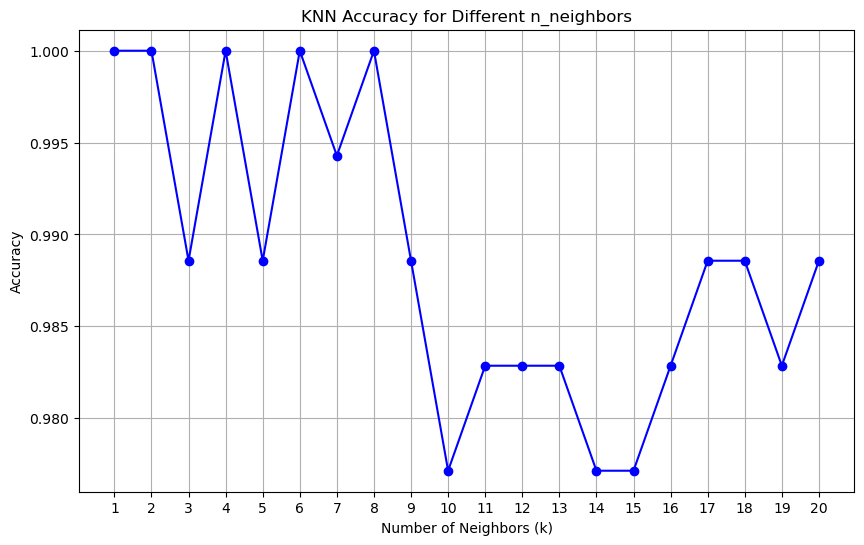

In [17]:


x=clean_data[["App Usage Time (min/day)","Battery Drain (mAh/day)","Screen On Time (hours/day)"]]
Y=clean_data["User Behavior Class"]

x_train,x_test,y_train,y_test=train_test_split(x,Y)

# Initialize list to store accuracies
accuracy_list = []

# Loop over values of k to determine the best one
for n in range(1, 21):  # Trying values from 1 to 20 for n_neighbors
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)

# Plotting accuracy vs. n_neighbors
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), accuracy_list, marker='o', linestyle='-', color='b')
plt.title("KNN Accuracy for Different n_neighbors")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.xticks(range(1, 21))
plt.grid(True)
plt.show()


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # 'weighted' for multi-class support
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

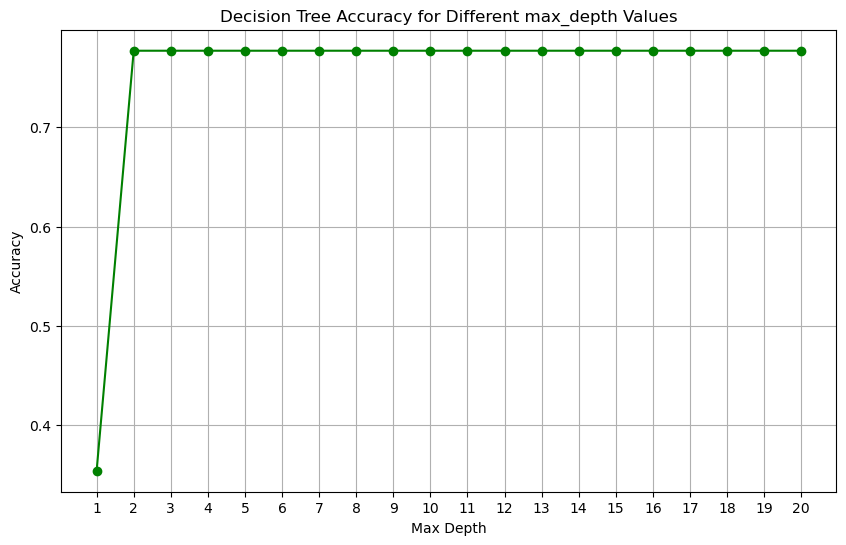

d:\ana\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [18]:
accuracy_list = []

# Testing accuracy for different values of max_depth
for depth in range(1, 21):  # Varying max_depth from 1 to 20
    clf = DecisionTreeClassifier(random_state=42, max_leaf_nodes=4, max_depth=depth)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)

# Plotting accuracy vs. max_depth
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), accuracy_list, marker='o', linestyle='-', color='g')
plt.title("Decision Tree Accuracy for Different max_depth Values")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.xticks(range(1, 21))
plt.grid(True)
plt.show()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # 'weighted' for multi-class support
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [19]:
# Naive Bayes algorithm 

gnb=CategoricalNB()
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)
print(f"The accuracy of Naive Bayes is : \n {accuracy_score(y_true=y_test, y_pred=y_pred)}")

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # 'weighted' for multi-class support
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

The accuracy of Naive Bayes is : 
 0.3028571428571429


In [22]:
#  Cross validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(gnb, x, Y, cv=5)
print(f"The cross validation scores for Naive Bayes are : \n {scores}")

scores = cross_val_score(clf, x, Y, cv=5)
print(f"The cross validation scores for DecisionTreeClassifier are : \n {scores}")

scores = cross_val_score(knn, x, Y, cv=5)
print(f"The cross validation scores for KNN are : \n {scores}")


The cross validation scores for Naive Bayes are : 
 [0.32857143        nan        nan 0.29285714 0.34285714]
The cross validation scores for DecisionTreeClassifier are : 
 [0.80714286 0.80714286 0.80714286 0.8        0.80714286]
The cross validation scores for KNN are : 
 [0.98571429 0.98571429 1.         1.         0.97857143]


d:\ana\Lib\site-packages\sklearn\model_selection\_validation.py:1011: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\ana\Lib\site-packages\sklearn\metrics\_scorer.py", line 141, in __call__
    score = scorer(estimator, *args, **routed_params.get(name).score)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\ana\Lib\site-packages\sklearn\metrics\_scorer.py", line 415, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\ana\Lib\site-packages\sklearn\base.py", line 764, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
                             ^^^^^^^^^^^^^^^
  File "d:\ana\Lib\site-packages\sklearn\naive_bayes.py", line 102, in predict
    jll = self._joint_log_likelihood(X)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\ana\Lib\site-package